In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle

In [51]:
dict_in = pd.read_pickle('30N_Od_removed_corrected.pkl')

In [52]:
dict_in.keys()

dict_keys(['1kmph', '1.5kmph', '3kmph', '4kmph', '5kmph', '6kmph', '7kmph', '8kmph', '9kmph', '10kmph', '15kmph', '20kmph'])

# Cycle Splitting Function

In [53]:
def cycle_split(data):
    
    # Filter for identifyting the cycle
    high_filt = data['temp'].max()
    low_filt = data['temp'].min()
    
    emt = []
    cycle_idx = []

    for i in np.arange(2,len(data)-1,1):
    
        diff = data['temp'][i+1]-data['temp'][i]
        emt.append(abs(diff))
        
        if (abs(diff) > 0.25*(high_filt-low_filt)):
            cycle_idx.append(i)
            
    return emt,cycle_idx 

# Cycle Plotting Function

In [54]:
def cycle_plot(data,lst):

    for i in np.arange(0,len(lst)-1,1):

        # Setting the name of the file
        speed = data['vel'].max()
        force = data['F_lever'].max()

        temp = data[lst[i]:lst[i+1]]

        # Initialise the subplot function using number of rows and columns
        figure, axis = plt.subplots(3, 2)

        # For Lever Force
        axis[0, 0].scatter(np.arange(0,len(temp),1),temp['F_lever'])
        axis[0, 0].set_title("Lever Force")

        # Lever Position
        axis[0, 1].scatter(np.arange(0,len(temp),1),temp['pos'])
        axis[0, 1].set_title("Lever Position")

        # For Fluid Pressure
        axis[1, 0].scatter(np.arange(0,len(temp),1),temp['press'])
        axis[1, 0].set_title("Fluid Pressure")

        # For Disc Temperature
        axis[1, 1].scatter(np.arange(0,len(temp),1),temp['temp'])
        axis[1,1].set_title("Disc Temperature")

        # For Velocity
        axis[2, 1].scatter(np.arange(0,len(temp),1),temp['vel'])
        axis[2,1].set_title("Velocity")

        # For Coefficient of Friction
        axis[2, 0].scatter(np.arange(0,len(temp),1),temp['mu'])
        axis[2,0].set_title("COF")

        plt.suptitle(f'Lever force = {int(force)} N and Velocity = {int(speed)} kmph for Cycle = {i+1}', fontsize=14)

        figure.tight_layout()
        
        str = f'{int(force)}N' +'_'+ f'{int(speed)}kmph' + f'_C{i+1}'
        
        # Combine all the operations and display
        plt.savefig(f'{str}.jpg',dpi=128)

        # Combine all the operations and display
        plt.show() 

# Main Code : Plots

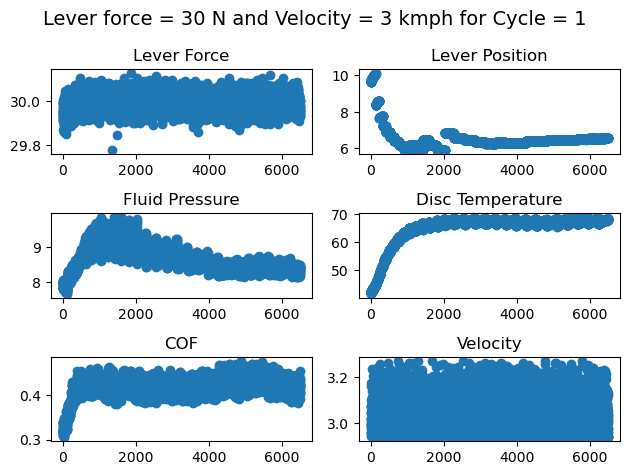

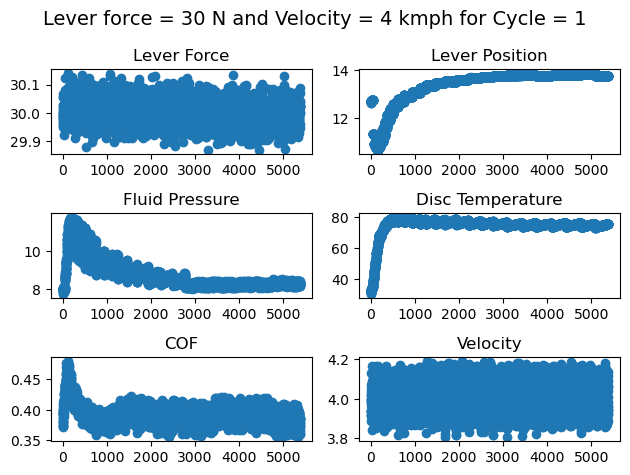

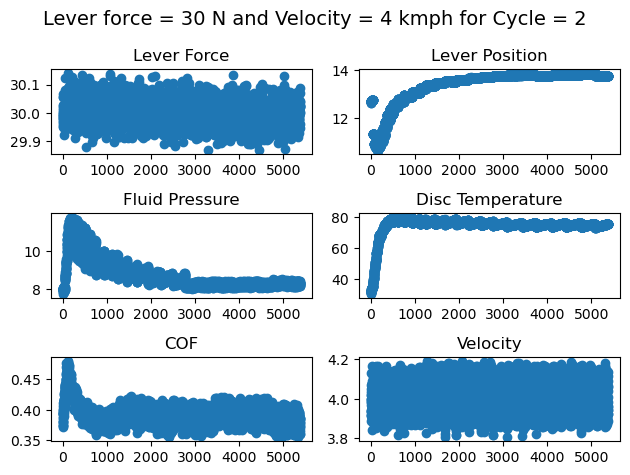

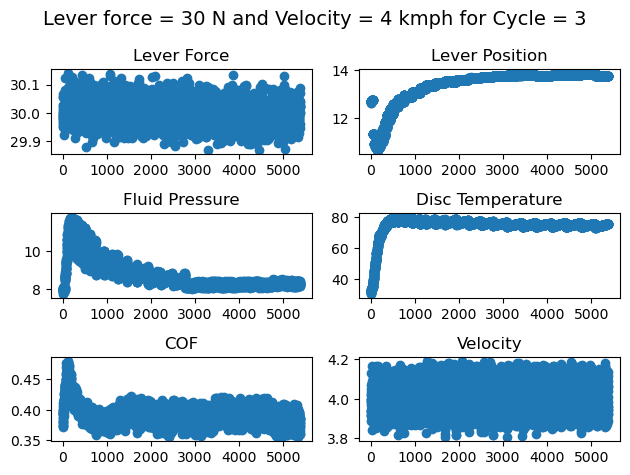

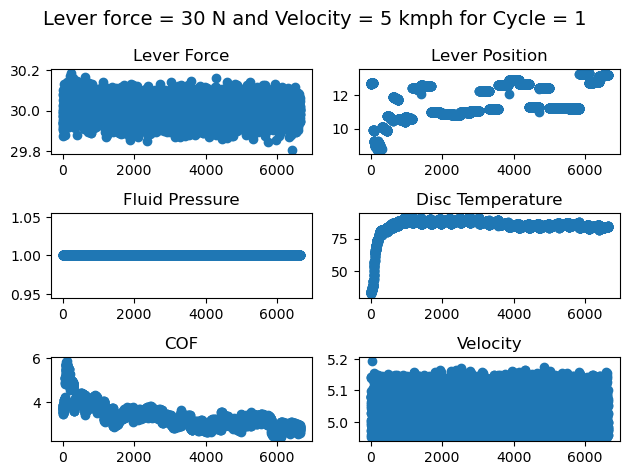

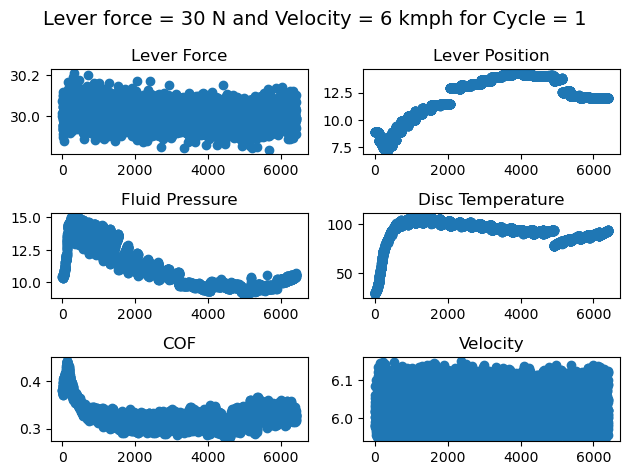

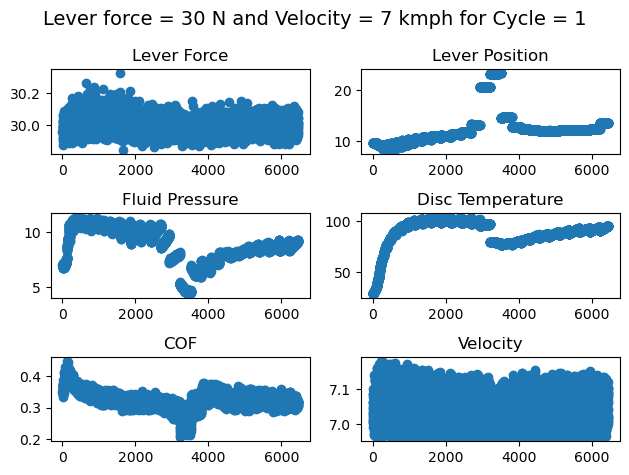

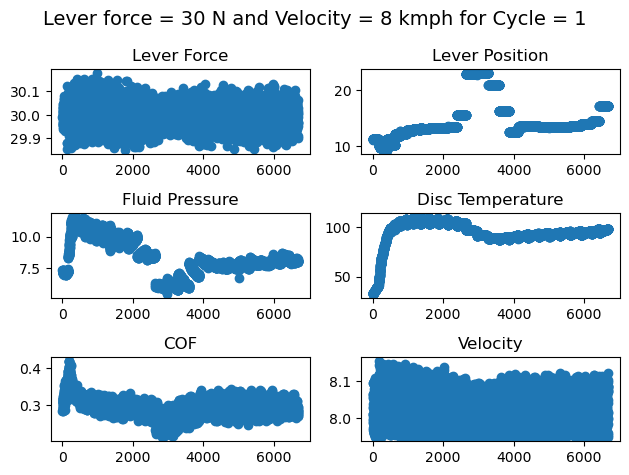

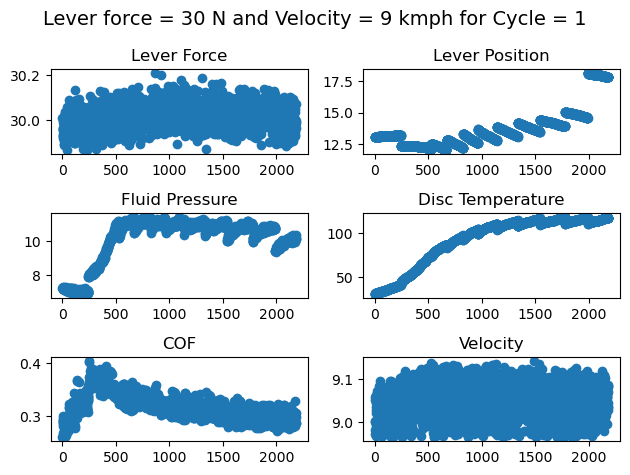

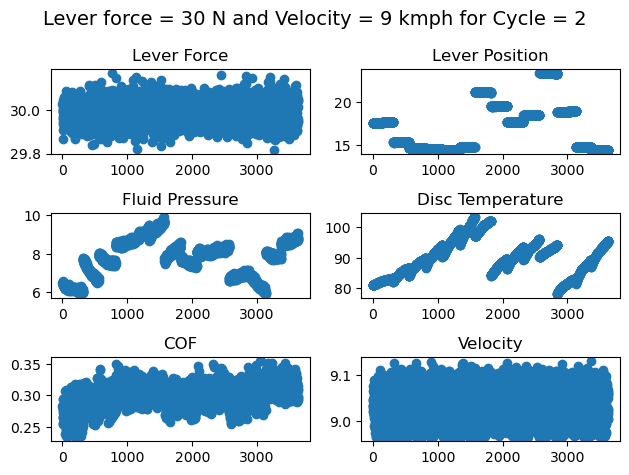

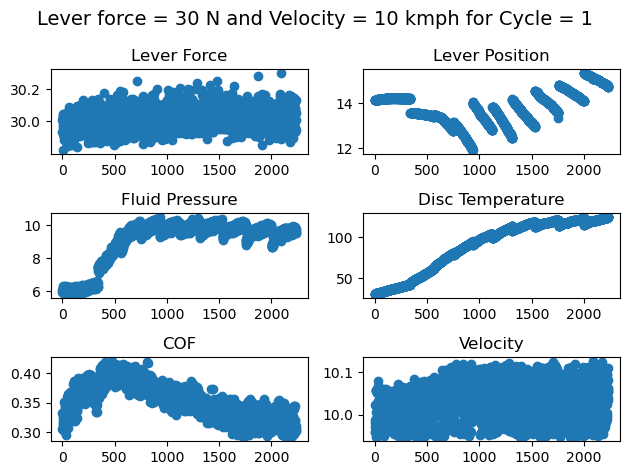

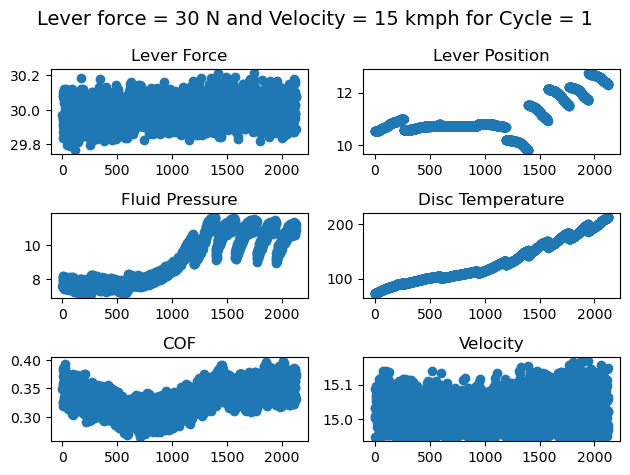

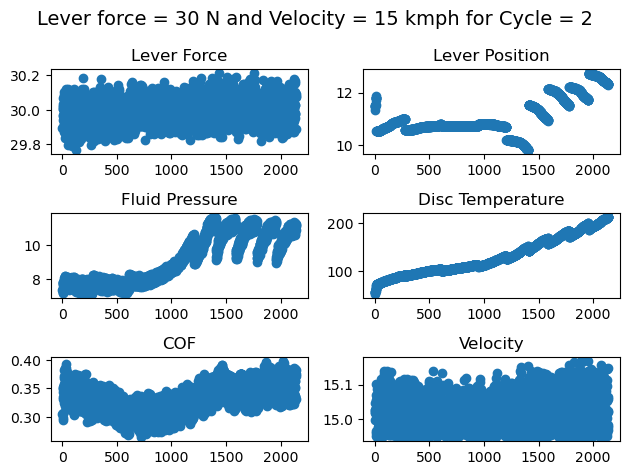

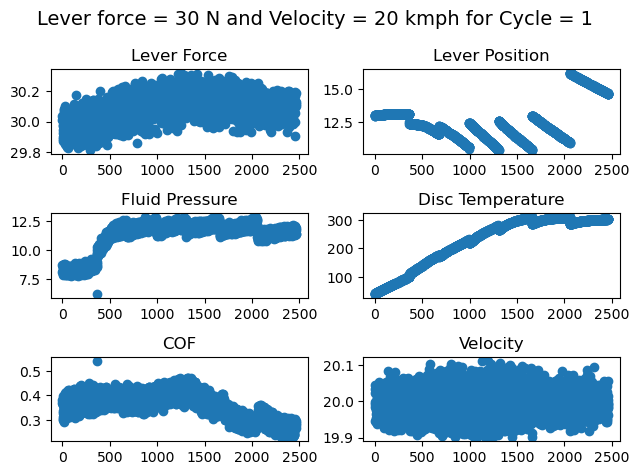

In [55]:
# i = 7

for i in np.arange(2,len(dict_in),1):

    # Setting up the dataframe
    data = pd.DataFrame(dict_in[list(dict_in.keys())[i]])
    data.reset_index(drop = True, inplace = True)

    emt,cycle_idx = cycle_split(data)

    # Data Split into Cycle index
    cycle_idx = [x+1 for x in cycle_idx] 
    lst  = [0] + cycle_idx + [len(data)]

    # Plotting Function
    cycle_plot(data,lst)


# Main Code : Pickle File

In [56]:
temp = {}
for i in list(dict_in.keys()):

    temp[i] = None

In [62]:
# i = 7

for i in np.arange(0,len(dict_in),1):
  

    # Setting up the dataframe
    data = pd.DataFrame(dict_in[list(dict_in.keys())[i]])
    data.reset_index(drop = True, inplace = True)

    if (not bool(dict_in[list(dict_in.keys())[i]]['press'])):
        
#         print(i)
        temp[list(dict_in.keys())[i]] = dict_in[list(dict_in.keys())[i]]

    else:
        
#         print(i)
        
        dict_in[list(dict_in.keys())[i]]

        emt,cycle_idx = cycle_split(data)

        # Data Split into Cycle index
        cycle_idx = [x+1 for x in cycle_idx] 
        lst  = [0] + cycle_idx + [len(data)]
        
        # Cycle Split loop
        temp[list(dict_in.keys())[i]] = {}
        
        for j in np.arange(0,len(lst)-1,1):
            
            str = 'C' + f'{j+1}'
            
            # Assigning the cycle data
            temp[list(dict_in.keys())[i]][str] = data[lst[j]:lst[j+1]].to_dict()

#         print('Success')

# Saving the Pickle File

In [59]:
f = open("30N_cycle_data.pkl","wb")

pickle.dump(temp,f)

# close file
f.close()

# Function for accessing all the Dictionary Keys

In [60]:
def nest_key(d, indent=0):
    
    for key, value in d.items():
        
        if isinstance(value, dict):
            
            print('\t' * indent + f'{key}')
            nest_key(value, indent+1)
            
#         else:
#             print('\t' * (indent+1) + str(value))

In [61]:
nest_key(temp)

1kmph
	vel
	T_cor
	F_lever
	T_SG
	press
	temp
	pos
	mu
1.5kmph
	vel
	T_cor
	F_lever
	T_SG
	press
	temp
	pos
	mu
3kmph
	C1
		vel
		T_cor
		F_lever
		T_SG
		press
		temp
		pos
		mu
4kmph
	C1
		vel
		T_cor
		F_lever
		T_SG
		press
		temp
		pos
		mu
	C2
		vel
		T_cor
		F_lever
		T_SG
		press
		temp
		pos
		mu
	C3
		vel
		T_cor
		F_lever
		T_SG
		press
		temp
		pos
		mu
5kmph
	C1
		vel
		T_cor
		F_lever
		T_SG
		press
		temp
		pos
		mu
6kmph
	C1
		vel
		T_cor
		F_lever
		T_SG
		press
		temp
		pos
		mu
7kmph
	C1
		vel
		T_cor
		F_lever
		T_SG
		press
		temp
		pos
		mu
8kmph
	C1
		vel
		T_cor
		F_lever
		T_SG
		press
		temp
		pos
		mu
9kmph
	C1
		vel
		T_cor
		F_lever
		T_SG
		press
		temp
		pos
		mu
	C2
		vel
		T_cor
		F_lever
		T_SG
		press
		temp
		pos
		mu
10kmph
	C1
		vel
		T_cor
		F_lever
		T_SG
		press
		temp
		pos
		mu
15kmph
	C1
		vel
		T_cor
		F_lever
		T_SG
		press
		temp
		pos
		mu
	C2
		vel
		T_cor
		F_lever
		T_SG
		press
		temp
		pos
		mu
20kmph
	C1
		vel
		T_cor
		F_lever
		T_